In [1]:
from google.colab import drive
drive.mount("/content/mydrive")

Mounted at /content/mydrive


In [2]:
%cd /content/mydrive/MyDrive/machine_learning/

/content/mydrive/MyDrive/machine_learning


In [3]:
pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 61.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('car_prediction_data.csv')

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [9]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
final_dataset['Current_Year']=2024

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024


In [15]:
final_dataset['no_year']=final_dataset['Current_Year']- final_dataset['Year']

In [16]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [17]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [19]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [20]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2024,10,False,True,False,True
1,4.75,9.54,43000,0,2024,11,True,False,False,True
2,7.25,9.85,6900,0,2024,7,False,True,False,True
3,2.85,4.15,5200,0,2024,13,False,True,False,True
4,4.60,6.87,42450,0,2024,10,True,False,False,True


In [21]:
final_dataset=final_dataset.drop(['Current_Year'],axis=1)

In [22]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [23]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [24]:
import seaborn as sns

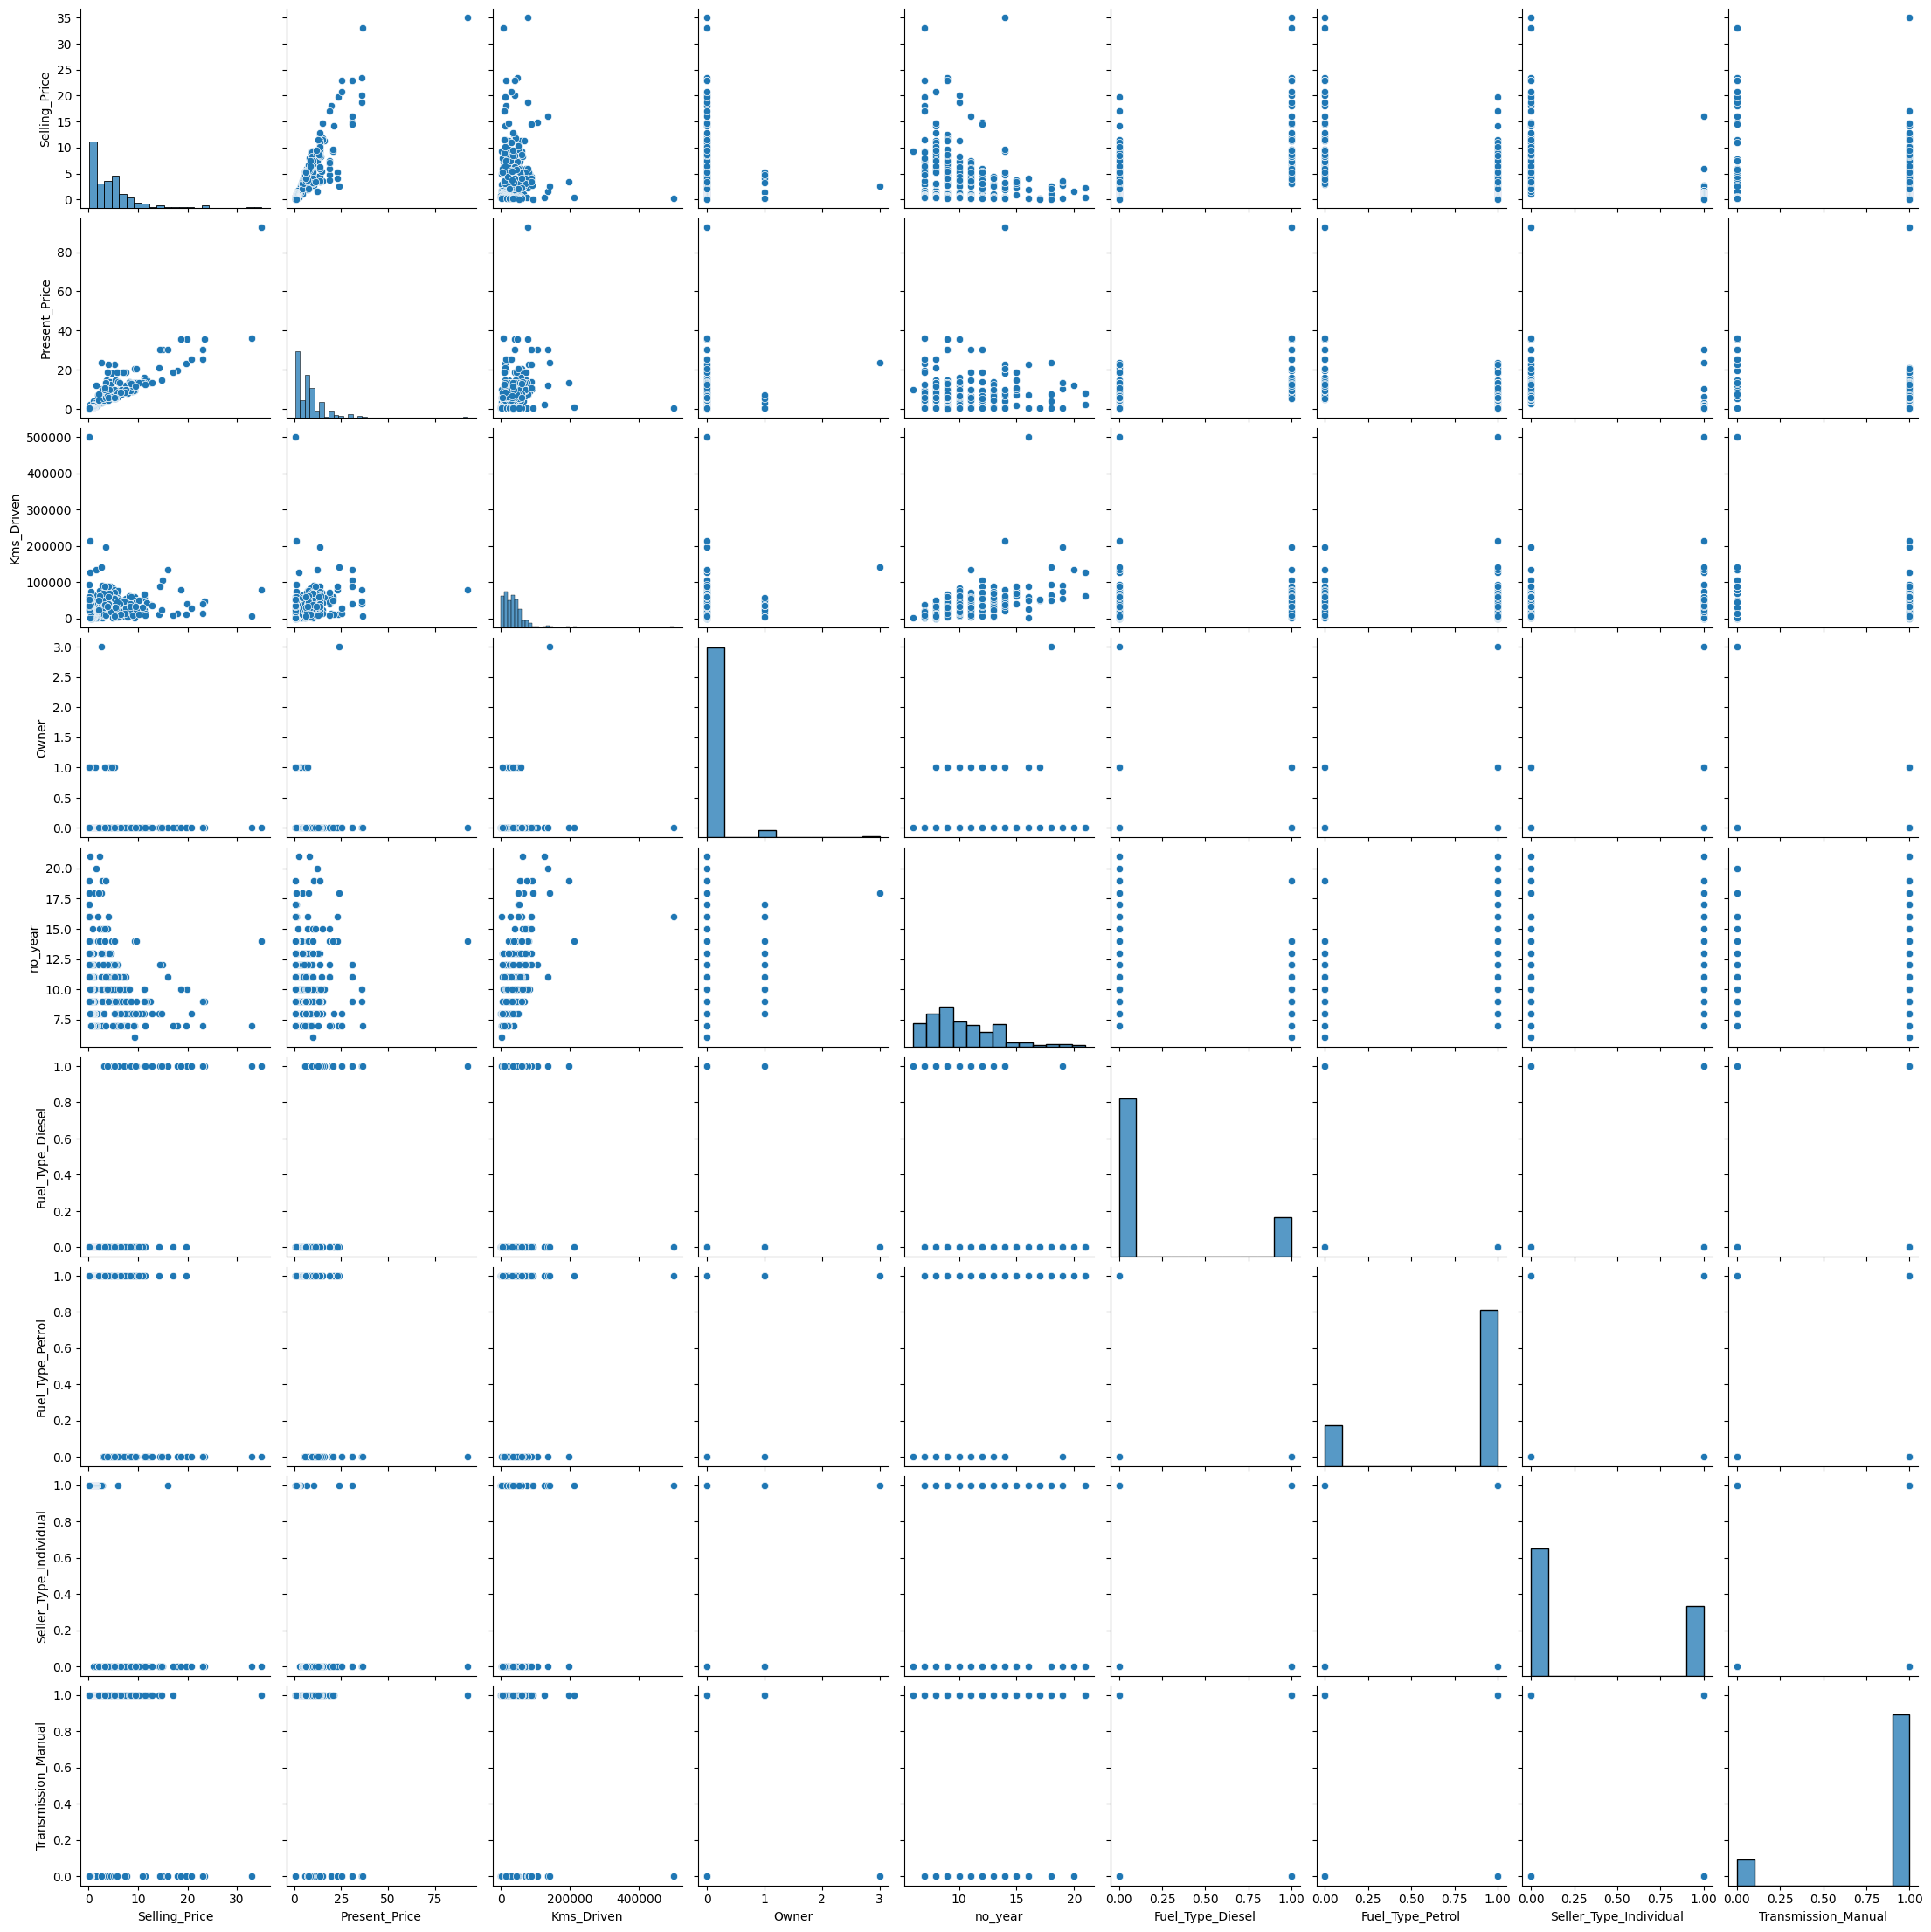

In [25]:
sns.pairplot(final_dataset)

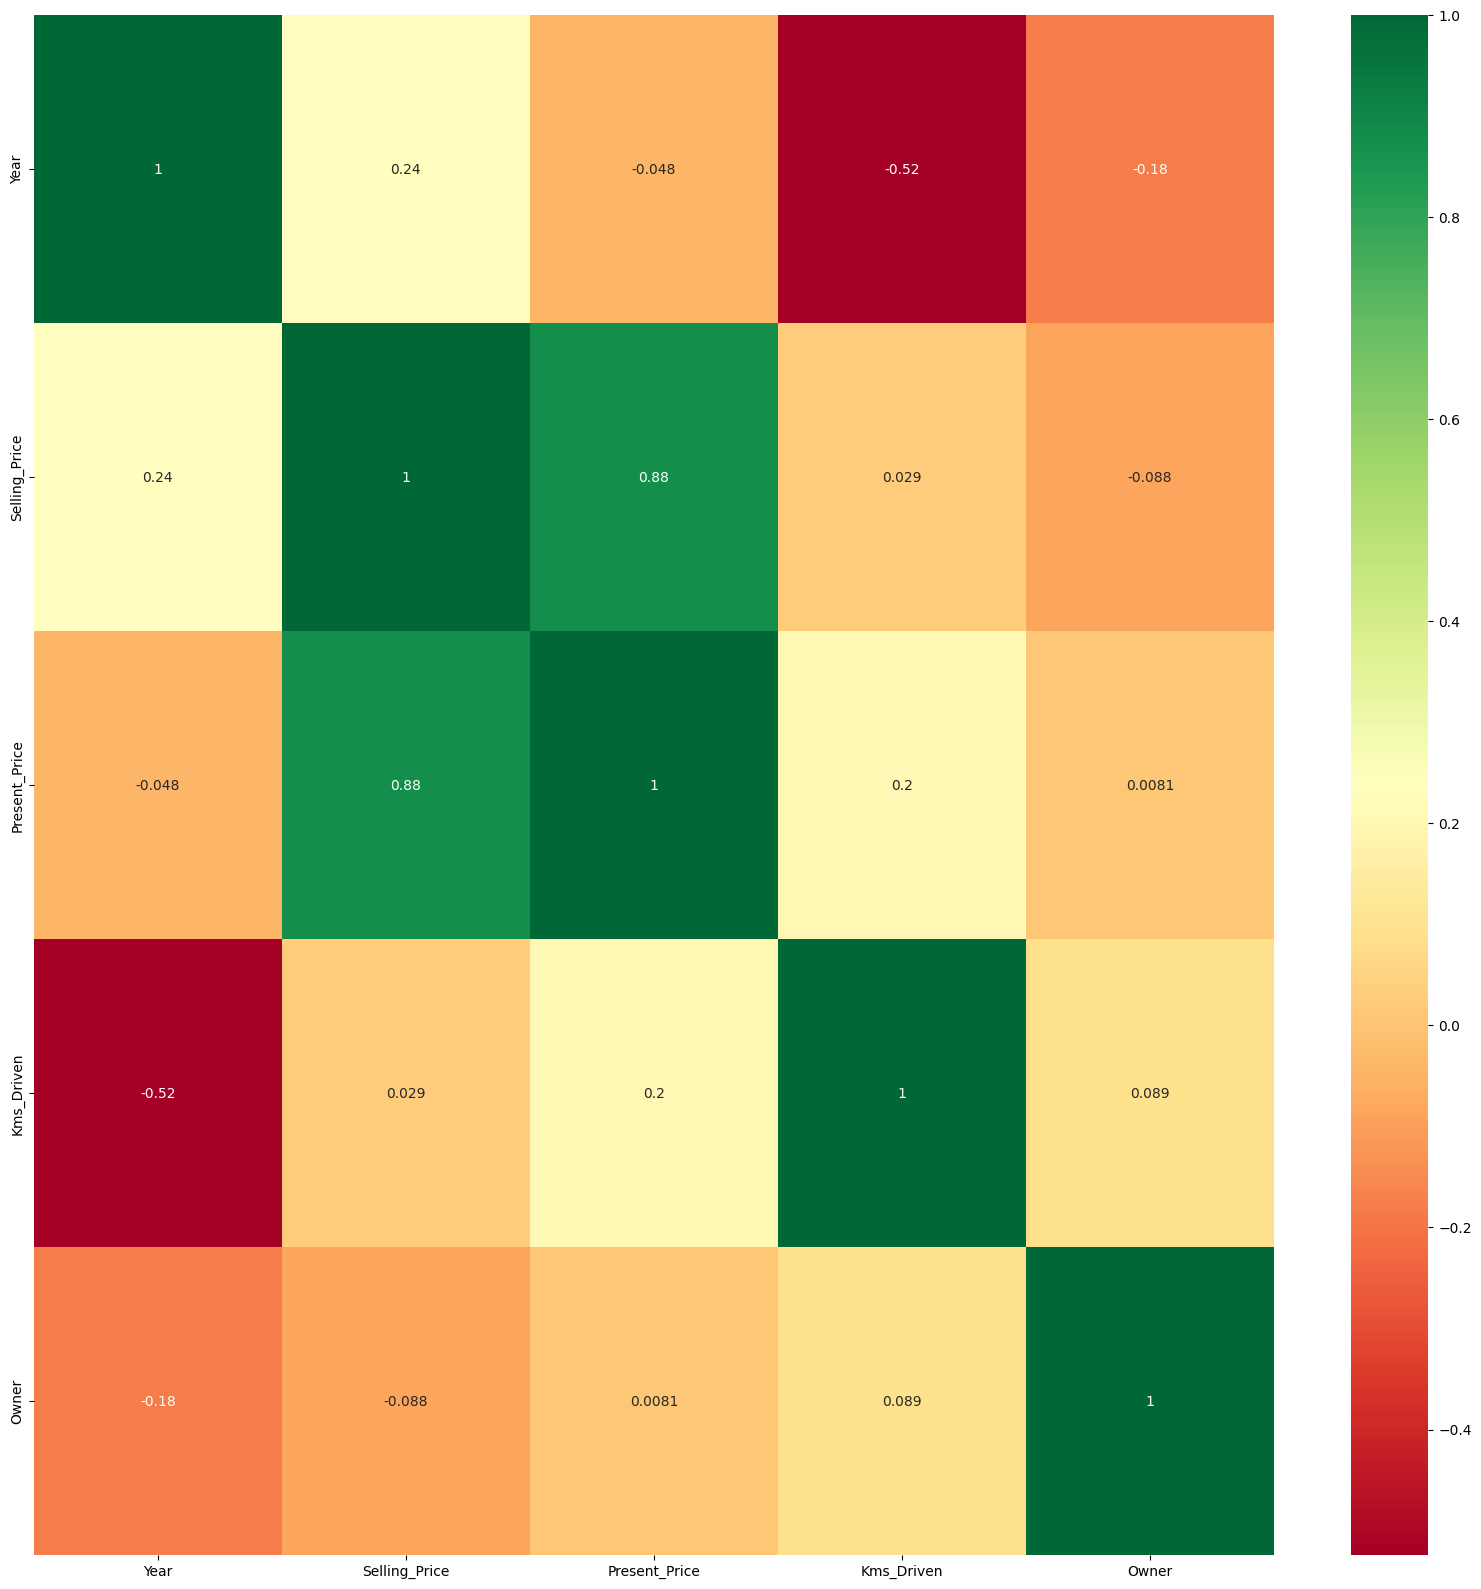

In [26]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
corrmat = numeric_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [28]:
X['Owner'].unique()

array([0, 1, 3])

In [29]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,False,True,False,True
1,9.54,43000,0,11,True,False,False,True
2,9.85,6900,0,7,False,True,False,True
3,4.15,5200,0,13,False,True,False,True
4,6.87,42450,0,10,True,False,False,True


In [30]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [31]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [32]:
print(model.feature_importances_)

[0.347495   0.03788634 0.00041413 0.08037705 0.2526925  0.0078745
 0.13148738 0.14177311]


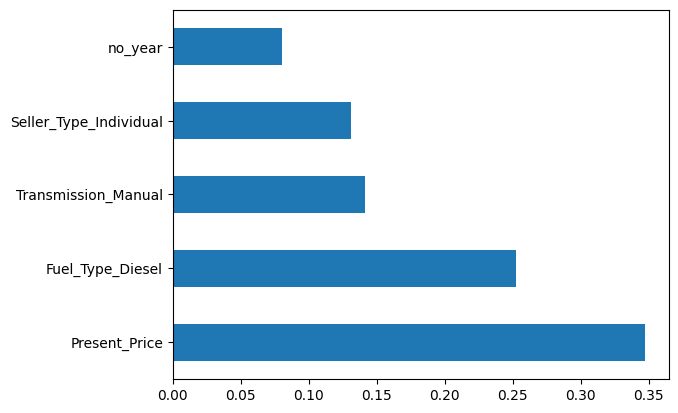

In [33]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
regressor=RandomForestRegressor()

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [39]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
rf = RandomForestRegressor()

In [41]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 25}

In [44]:
rf.best_score_

-3.6397652807332266

In [45]:
predictions=rf.predict(X_test)

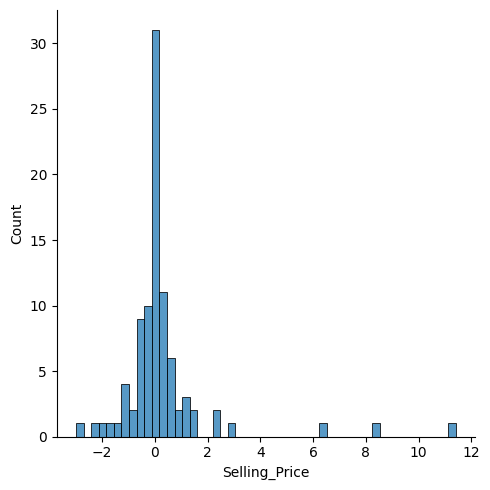

In [46]:
sns.displot(y_test-predictions)

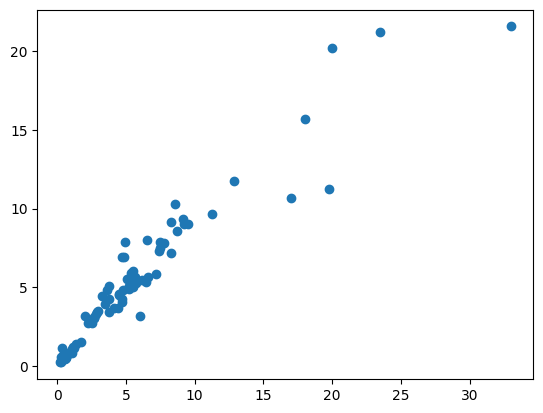

In [47]:
plt.scatter(y_test,predictions)

In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8137980219780172
MSE: 3.3775909854285686
RMSE: 1.8378223487128913


In [50]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [51]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

In [52]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [53]:
xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [54]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.1s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299; total time=   0.0s
[CV] END gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299; total time=   0.0s
[CV] END gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:58] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

[CV] END gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299; total time=   0.1s
[CV] END gamma=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299; total time=   0.0s
[CV] END gamma=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.1s
[CV] END gamma=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[CV] END gamma=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.1s
[CV] END gamma=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.1s
[CV] END gamma=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.1s
[CV] END gamma=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[CV] END gamma=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.1s
[CV] END gamma=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.0s
[CV] END gamma=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.1s
[CV] END gamma=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[CV] END gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.1s
[CV] END gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.1s
[CV] END gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.1s
[CV] END gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:48:59] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[CV] END gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.1s
[CV] END gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282; total time=   0.1s
[CV] END gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282; total time=   0.0s
[CV] END gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282; total time=   0.0s
[CV] END gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

[CV] END gamma=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282; total time=   0.1s
[CV] END gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[CV] END gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[CV] END gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[CV] END gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[CV] END gamma=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

[CV] END gamma=0.28164410892276964, learning_rate=0.14562495076197482, max_depth=3, n_estimators=101, subsample=0.8736932106048627; total time=   0.1s
[CV] END gamma=0.28164410892276964, learning_rate=0.14562495076197482, max_depth=3, n_estimators=101, subsample=0.8736932106048627; total time=   0.0s
[CV] END gamma=0.28164410892276964, learning_rate=0.14562495076197482, max_depth=3, n_estimators=101, subsample=0.8736932106048627; total time=   0.0s
[CV] END gamma=0.28164410892276964, learning_rate=0.14562495076197482, max_depth=3, n_estimators=101, subsample=0.8736932106048627; total time=   0.0s
[CV] END gamma=0.28164410892276964, learning_rate=0.14562495076197482, max_depth=3, n_estimators=101, subsample=0.8736932106048627; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

[CV] END gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s
[CV] END gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s
[CV] END gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s
[CV] END gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s
[CV] END gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:49:00] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e5d0fc1fb80>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5d0fc1ef50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5d0fc1e050>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e5d0fc4c2e0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
xgb.best_score_

-1.9114686351785255

In [56]:
xgb.best_params_

{'gamma': 0.3005575058716044,
 'learning_rate': 0.24242177333881365,
 'max_depth': 3,
 'n_estimators': 101,
 'subsample': 0.8887995089067299}

In [57]:
predictions=xgb.predict(X_test)

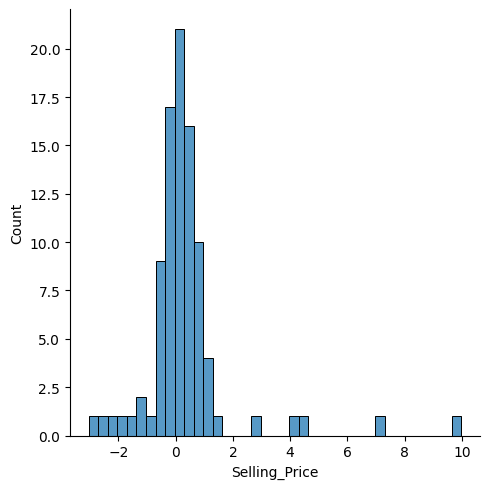

In [58]:
sns.displot(y_test-predictions)

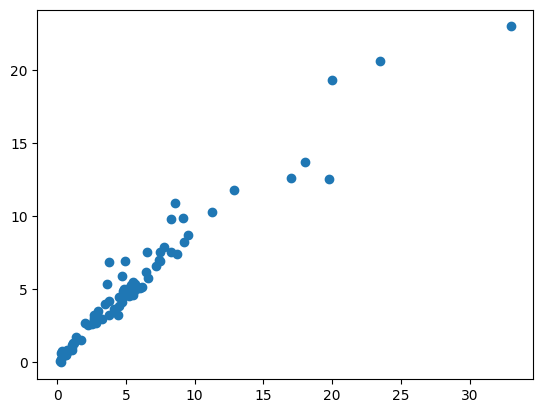

In [59]:
plt.scatter(y_test,predictions)

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7972087596921802
MSE: 2.6811867849257176
RMSE: 1.637432986392334


In [62]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [63]:
from catboost import CatBoostRegressor

In [64]:
cb=CatBoostRegressor()

In [65]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [66]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [67]:
cb.fit(X_train,y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
4:	learn: 3.8910511	total: 1.72ms	remaining: 343ms
5:	learn: 3.8042501	total: 2.3ms	remaining: 382ms
6:	learn: 3.7335546	total: 2.74ms	remaining: 389ms
7:	learn: 3.6654672	total: 3.03ms	remaining: 376ms
8:	learn: 3.5954819	total: 3.31ms	remaining: 365ms
9:	learn: 3.5235478	total: 3.58ms	remaining: 355ms
10:	learn: 3.4429063	total: 3.85ms	remaining: 346ms
11:	learn: 3.3864070	total: 4.14ms	remaining: 341ms
12:	learn: 3.3191191	total: 4.43ms	remaining: 336ms
13:	learn: 3.2539073	total: 4.72ms	remaining: 332ms
14:	learn: 3.1978092	total: 5.09ms	remaining: 335ms
15:	learn: 3.1368599	total: 5.38ms	remaining: 331ms
16:	learn: 3.0708448	total: 5.68ms	remaining: 328ms
17:	learn: 3.0097992	total: 5.97ms	remaining: 326ms
18:	learn: 2.9556630	total: 6.26ms	remaining: 323ms
19:	learn: 2.9098979	total: 6.56ms	remaining: 321ms
20:	learn: 2.8467741	total: 6.84ms	remaining: 319ms
21:	learn: 2.7881907	total: 7.12ms	remaining:

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7e5d0102fdf0>,
                   n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [68]:
cb.best_score_

-3.2179271237932716

In [69]:
cb.best_params_

{'learning_rate': 0.1, 'l2_leaf_reg': 9, 'depth': 4}

In [70]:
predictions=cb.predict(X_test)

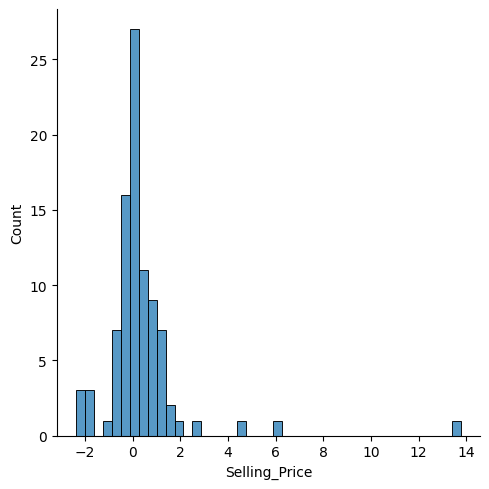

In [71]:
sns.displot(y_test-predictions)

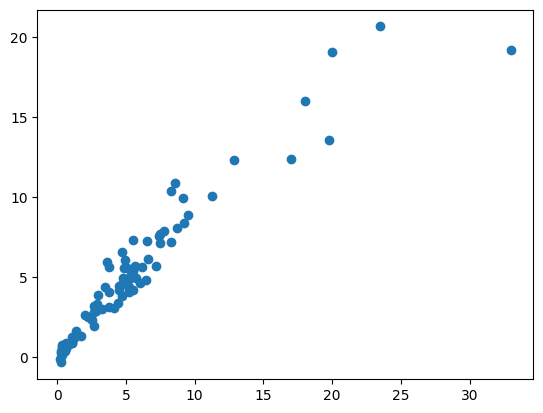

In [72]:
plt.scatter(y_test,predictions)

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8568669682476366
MSE: 3.4731227057809524
RMSE: 1.8636315906801302


In [75]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.4 MB/s eta 0:00:00


In [76]:
from lightgbm import LGBMRegressor

In [77]:
lb=LGBMRegressor()

In [78]:
lb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 7
[LightGBM] [Info] Start training from score 4.459143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor()

In [79]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [80]:
lb = RandomizedSearchCV(estimator = lb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [81]:
lb.fit(X_train,y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.946470458309

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e5ceab9f3a0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e5ceab9e080>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5ceab9efb0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5ceab9f6d0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e5ceab9dba0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [82]:
lb.best_params_

{'gamma': 0.34015376929388985,
 'learning_rate': 0.16514977559086289,
 'max_depth': 3,
 'n_estimators': 103,
 'subsample': 0.9768807022739411}

In [83]:
lb.best_score_

-5.776105814158411

In [84]:
predictions=lb.predict(X_test)

[LightGBM] [Warning] Unknown parameter: gamma


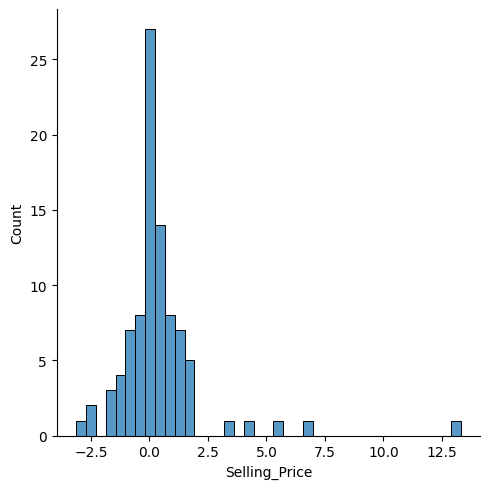

In [85]:
sns.displot(y_test-predictions)

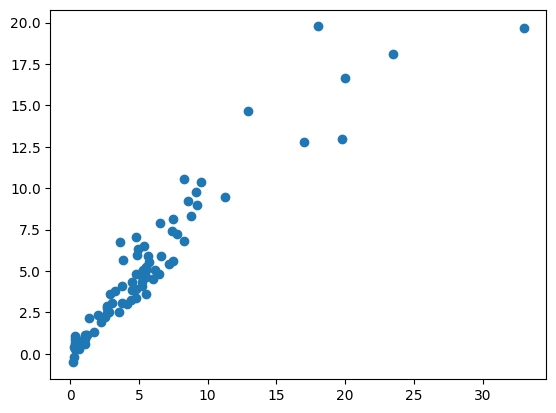

In [86]:
plt.scatter(y_test,predictions)

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0132939743818592
MSE: 3.934934144002637
RMSE: 1.9836668429962319
